# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# creating the sales data 
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
#writing a function to calculate mean variance and standard deviation
def mvstd(nums):
  mean = sum(nums) / len(nums)
  distances = []
  [distances.append(num - mean) for num in nums]
  squared_dist = []
  [squared_dist.append(dist ** 2) for dist in distances]
  variance = sum(squared_dist) / len(squared_dist)
  std = variance ** .5
  [print(name, variable) for name, variable in [('mean', mean), ('variance', variance), ('standard deviation', std)]]

In [3]:
#testing the function 
mvstd(sales)

mean 3052.714285714286
variance 183761.06122448976
standard deviation 428.67360686714756


In [4]:
#checking my answers with numpy 
import numpy as np 
print(np.mean(sales))
print(np.var(sales))
print(np.std(sales))

3052.714285714286
183761.06122448976
428.67360686714756


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [5]:
#turning sales into a df 
import pandas as pd
sales_cust = pd.DataFrame({'sales':sales})
sales_cust

,sales
0,3505
1,2400
2,3027
3,2798
4,3700
5,3250
6,2689


In [6]:
#creating list for customers and adding it to the dataframe
cust = [127,80,105,92,120,115,93]
sales_cust['customers'] = pd.Series(cust)
sales_cust

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [7]:
#finding the covariance 
sales_cust_cov = sales_cust.cov()
sales_cust_cov

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


In [8]:
#double checking with numpy 
np.cov(sales, cust)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
#finding standard deviation of the two 
std_sales = sales_cust['sales'].std(ddof=1)
std_cust = sales_cust['customers'].std(ddof=1)

In [10]:
#finding the covariance between the two 
cov = sales_cust_cov['sales'][1]
cov

7604.357142857142

In [0]:
denom = std_sales * std_cust

In [12]:
corr_sc = cov/denom
corr_sc

0.9628339778148909

In [13]:
#checking my work with pandas 
sales_cust.corr()

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [14]:
titanic= pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
titanic.drop('Unnamed: 0', axis=1, inplace=True)
titanic.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
218,1.0,1.0,"Oliva y Ocana, Dona. Fermina",female,39.0,0.0,0.0,PC 17758,108.900,C105,C,8,NaN,NaN,1
517,2.0,0.0,"Nesson, Mr. Israel",male,26.0,0.0,0.0,244368,13.000,F2,S,NaN,NaN,"Boston, MA",1
206,1.0,0.0,"Minahan, Dr. William Edward",male,44.0,2.0,0.0,19928,90.000,C78,Q,NaN,230.0,"Fond du Lac, WI",1
935,3.0,1.0,"Kink-Heilmann, Mr. Anton",male,29.0,3.0,1.0,315153,22.025,NaN,S,2,NaN,NaN,0
374,2.0,0.0,"Coleridge, Mr. Reginald Charles",male,29.0,0.0,0.0,W./C. 14263,10.500,NaN,S,NaN,NaN,"Hartford, Huntingdonshire",0


In [15]:
titanic.cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [16]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


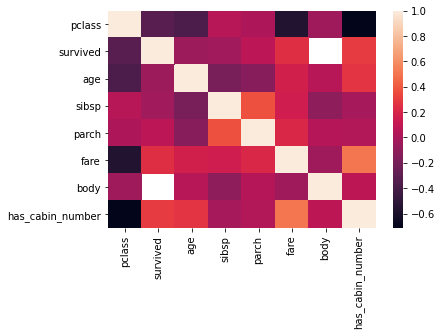

In [17]:
import seaborn as sns
sns.heatmap(titanic.corr());

# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [40]:
#creating two 2d random arrays so they can be easily plotted 
x = np.array([1,2])
y = np.random.randn(2)
print(x, y)

[1 2] [1.16809705 0.03519227]


In [41]:
#making y an orthoginal of x  
y -= y.dot(x) * x /np.linalg.norm(x)**2 
y 

array([ 0.92040073, -0.46020036])

In [42]:
#checking that its orthoginal before plotting 
xy = np.dot(x,y)
print('{:.5f}'.format(xy))

0.00000


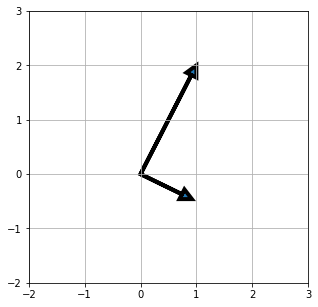

In [43]:
#plotting the vectors 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (5,5))
ax.grid()
plt.xlim(-2, 3)
plt.ylim(-2, 3)

for letter in [x, y]:
  plt.arrow(0,0,
            letter[0],
            letter[1],
            head_width = .2,
            head_length = .2,
            linewidth=4,
            length_includes_head = True);

#The synonym for orthoginal is perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [60]:
#creating the two vectors 
a = np.array([-5, 3, 7])
b = np.array(([[6], [-8], [2]]))
a

array([-5,  3,  7])

In [61]:
np.dot(a,b)

[-40]


## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

Your text here

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

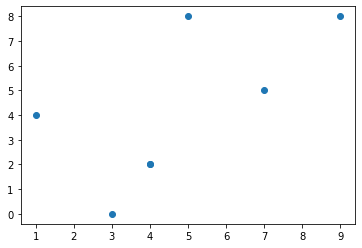

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()